Before we discuss our first numerical algorithm, we have to give a definition that will allow us to understand accuracy.

#### Definition (Rate of Convergence)

Suppose $\{\beta_n\}_{n=1}^\infty$, $\beta_n > 0$ is a sequence known to converge to zero, and $\{\alpha_n\}_{n=1}^\infty$ converges to a number $\alpha$.  If a positive constant $K$ exists such that

$$ |\alpha_n - \alpha| \leq K \beta_n, $$

the we say that $\{\alpha_n\}_{n=1}^\infty$ converges to $\alpha$ with __rate__ (or __order__) $O(\beta_n)$.

In this case we also write

$$ \alpha_n = \alpha + O(\beta_n)$$

to indicate that the error decays like $\beta_n$.

#### Example

Consider $\displaystyle \alpha_n = \frac{n+1}{n+2}$.  Then, we know that $\alpha_n \to 1$ as $n \to \infty$.  Find the rate of convergence.  Note: When we want to find the rate, we really want the "best possible rate".

#### Example

Consider the sum $\displaystyle \alpha_n = \sum_{k=0}^n \frac{1}{2^k}$.  Using that $\alpha_n \to 2$ as $n \to \infty$, find the rate of convergence of $\alpha_n$.

We can also talk about order of convergence when we do not have a sequence:

####  Definition

Suppose that for a postive function $g(h) > 0$ we have $\lim_{h\to 0} g(h) = 0$.  We say that $f(h)$ converges to $L$ at $O(g(h))$ (equiv. $f(h) = L + O(g(h))$) if

$$ |f(h) - L| \leq K g(h) $$

for some positive constant K.

#### Example

An approximation to the derivative of $\sin(x)$ at $x = 0$ is given by

$$ f(h) = \frac{\sin(h) - \sin(0)}{h}. $$

Show that $f(h) = 1 + O(h^2)$.  

### Bisection Method

We now consider the __root-finding problem__.  Given a continuous function $f$, we what to find points $x$ (called roots) where $f(x) = 0$.  The Bisection method is a method for doing this.

<br>

Assume $f \in C[a,b]$ and $f(a) < 0$ and $f(b) > 0$.  The case where $f(a) > 0$ and $f(b) < 0$ is analogous.  What we really require here is that $f(a)f(b) < 0$.

From the intermediate value theorem, we are guaranteed to have at least one (could be many!) value $c$ such that $f(c) = 0$.  



We have that $f(a) < 0$ and $f(b) > 0$.  Set $a_1 = a$ and $b_1 = b$.  Let $p_1  = (a_1+b_1)/2$.

Then we look at the sign of $f(p_1)$.  

* If $f(p_1) < 0$ then $f$ must have a root between $p_1$ and $b_1$.
* If $f(p_1) = 0$, we've found a root.
* If $f(p_1) > 0$ then $f$ must have a root between $a$ and $p_1$.

After this process, we've narrowed our search for a root from the interval $[a,b]$ (has length $b-a)$) to either the interval

$$ \left[a, \frac{a+b}{2} \right] \quad \text{or} \quad \left[ \frac{a+b}{2}, b \right].$$

These both have lengths $(b-a)/2$.  Assume $f(p_1) > 0$.  Then set $a_2 = a_1, b_2 = p_1, p_2 = (a_2+b_2)/2$ and repeat.

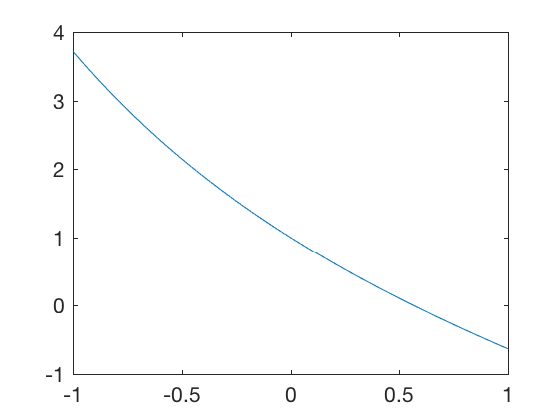

In [33]:
f = @(x) exp(-x) - x;
x = linspace(-1,1,100);
plot(x,f(x));

In [34]:
a = -1; b = 1;
f(a)
f(b)

ans =

    3.7183


ans =

   -0.6321


#### Pseudo-code for the Bisection method

### Error Analysis for Bisection

We will now determine the order of convergence of the Bisection method.  In the algorithm we take $p_n$ (the definition of $p$ in the $n$th iteration) to be the approximation of the root:

$$ p_1 = \frac{a+b}{2}. $$

Let $p^*$ be the actual root.  We then estimate

$$ |p_1 - p^*| \leq \frac{b-a}{2}.$$

So, the error in one step the bisection algorithm is bounded by half of the length of the interval that is being searched.

In the second step of the Bisection method we search an interval of length $(b-a)/2$ and so

$$ |p_2 - p^*| \leq \frac{b-a}{4} = \frac{b-a}{2^2}.$$

From this, the general formula follows:

#### Theorem

Suppose that $f \in C[a,b]$ and $f(a)\cdot f(b) < 0$.  The Bisection method generates a sequence $\{p_n\}_{n=1}^\infty$, approximating a root $p^*$ such that

$$ |p_n - p^*| \leq \frac{b-a}{2^n}.$$

Said another way, $p_n = p + O(2^{-n})$.

In [70]:
f = @(x) exp(-x) - x;
p = bisection(f,-1,1,.001,100)
f(p)

p =

    0.5684


ans =

   -0.0019


#### Finding many roots

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}. $$

We want to compute all the roots of this function.  From the plot it appears there are 10.

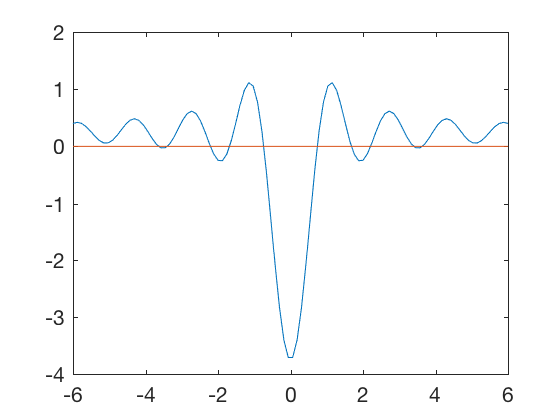

In [66]:
f = @(x) 1/4 - sin(4*x)./x;
x = linspace(-6,6,100);
plot(x,f(x))
hold on
plot(x,0*x)

In [69]:
f = @(x) 1/4 - sin(4*x)./x;  % Our function
x = linspace(-6,6,100); % place a grid on [-6,6]
roots = 0; % a counter for the number of roots found
p = []; % a vector to collect the roots as they are computed
for i = 1:length(x)-1  %loop through the grid
    if f(x(i))*f(x(i+1)) < 0 % if f(x) changes sign, there must be a root
                                % and we use bisection
        roots = roots + 1;
        p(roots) = bisection(f,x(i),x(i+1),.00000001,100);    
    end
end
p
max(abs(f(p)))

p =

  Columns 1 through 7

   -3.6410   -3.3950   -2.2099   -1.6791   -0.7389    0.7389    1.6791

  Columns 8 through 10

    2.2099    3.3950    3.6410


ans =

   3.1438e-08
